# Machine Learning Foundation

## Course 6, Part b: Decomposition LAB

# Introduction

Here we will discuss decomposition of your time series data into three components: 
1. Trend
2. Seasonality
3. Residual 


# Learning Outcomes

What will we accomplish?
1. First, we'll separately construct each time series component. 
2. Then we'll bring the three components together to create a simulated time series dataset. 
3. Finally, we'll leverage time series model decomposition in Python to deconstruct the series. 

We'll complete this process for the two most common processes: additive and multiplicative.

The whole point of this exercise is to get you familiar with time series data and simple modeling approaches. 

You should walk away from this tutorial with:
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data in Python

# Imports

In [1]:
import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns

---
# Section 1: Construct Trend, Seasonality, and Residual Components

In this lesson, we will individually construct fictional trend, seasonality, and residual components. This is merely an example to show you how a simple time series dataset is constructed. This will aid your understanding later on. In the meantime, let's create a time interval of minutes. 

In [2]:
time = np.arange(1, 51)

Now we need to create a trend. Let's pretend we have a sensor measuring demand for electricity. We'll ignore units to keep things simple.

In [3]:
trend = time * 3.14

What folllows is a plot showing trend as a function of time.

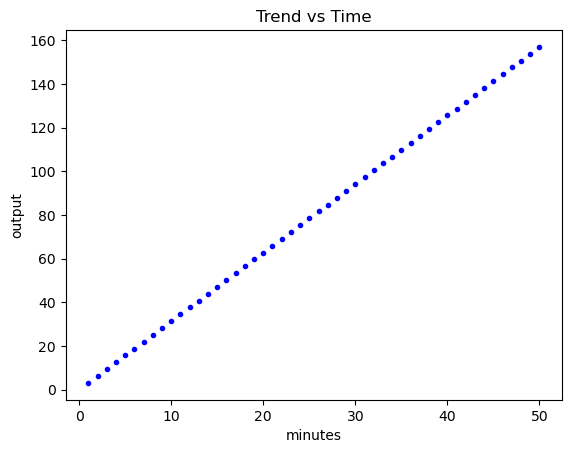

In [4]:
plt.plot(time, trend, 'b.')
plt.title("Trend vs Time")
plt.xlabel("minutes")
plt.ylabel("output");

Great! Now let's generate a seasonal component.

In [5]:
seasonal = 15 + np.sin(time) * 12

Naturally, we'll want to plot our seasonality.

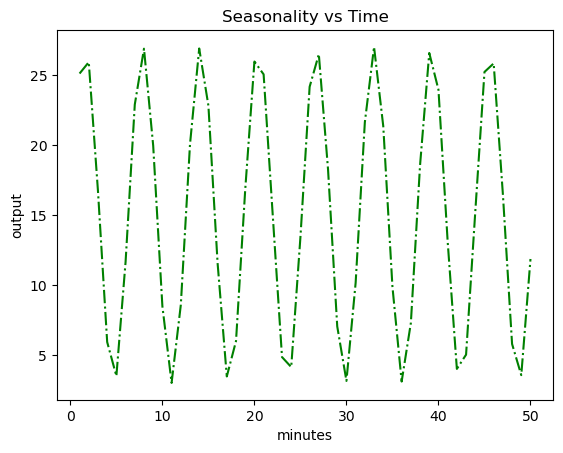

In [6]:
plt.plot(time, seasonal, 'g-.')
plt.title("Seasonality vs Time")
plt.xlabel("minutes")
plt.ylabel("output");

And now to construct the residual component.

In [7]:
# Set a seed for reproducible random number generation
np.random.seed(2)  

# Generate random noise (residual) for your time series
#  - loc (float): The mean (center) of the normal distribution.
#  - scale (float): The standard deviation (spread) of the normal distribution.
residual = np.random.normal(loc=0.0, scale=1, size=len(time))

A quick plot of residuals...

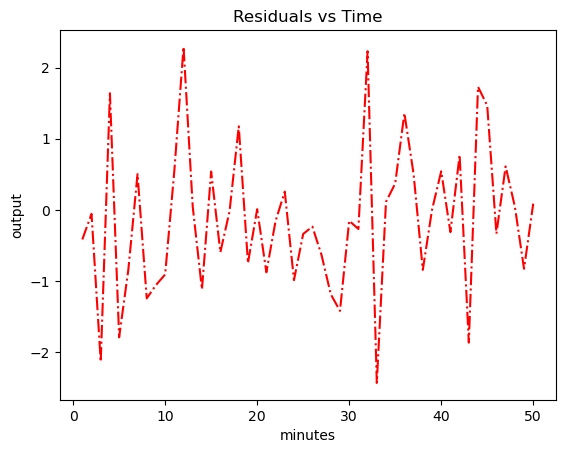

In [8]:
plt.plot(time, residual, 'r-.')
plt.title("Residuals vs Time")
plt.xlabel("minutes")
plt.ylabel("output");

Quick recap: We created data for the fictional demand of electricity as measured by a fictional sensor. We did this by creating the three necessary components of time series data, which include trend, seasonality, and residuals. 

Next step: Aggregate the three components to create time series data. We'll do this for two different types of models: additive and multiplicative.

---
# Section 2: Aggregate Trend, Seasonality, and Residual Components

### Additive Time Series
Remember the equation for additive time series is simply: $O_{t} = T_{t} + S_{t} + R_{t}$ 

$O_{t}$ is the output   
$T_{t}$ is the trend  
$S_{t}$ is the seasonality  
$R_{t}$ is the residual  
$_t$ is a variable representing a particular point in time 

In [9]:
additive = trend + seasonal + residual

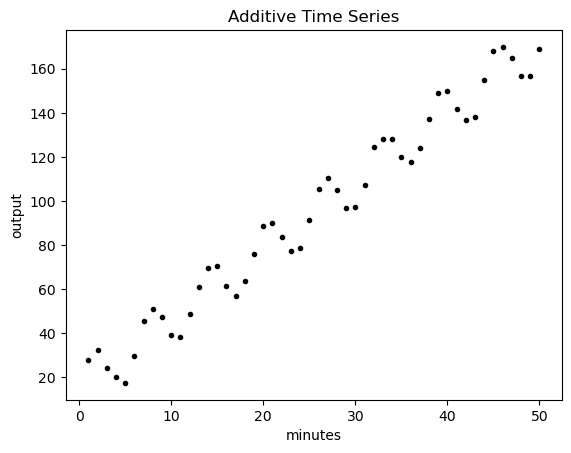

In [10]:
plt.plot(time, additive, 'k.')
plt.title("Additive Time Series")
plt.xlabel("minutes")
plt.ylabel("output");

We clearly see trend and seasonality in the plot above, as expected.

Now let's build a multiplicative time series dataset. 

### Multiplicative Time Series

Remember the equation for multiplicative time series is simply: $O_{t} = T_{t} * S_{t} * R_{t}$ 

In [11]:
# ignoring residual to make pattern more apparent
ignored_residual = np.ones_like(residual)
multiplicative = trend * seasonal * ignored_residual

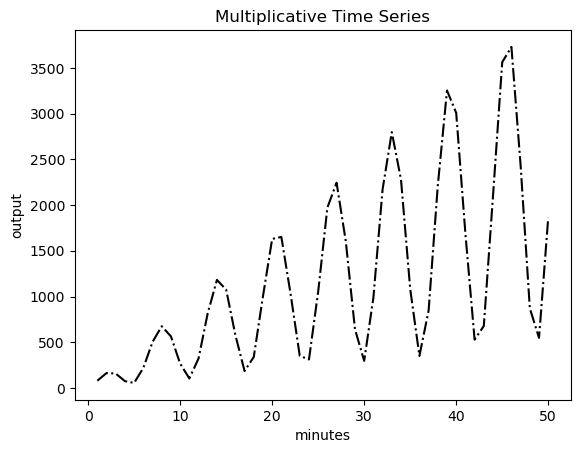

In [12]:
plt.plot(time, multiplicative, 'k-.')
plt.title("Multiplicative Time Series")
plt.xlabel("minutes")
plt.ylabel("output");

### Exercise #1
In this exercise, your task is two-fold:
1. Determine if **Dataset_A** and **Dataset_B** are additive or multiplicative time series.
2. Determine the frequency of the seasonal component.

#### Set Path / Load Datasets

In [13]:
### BEGIN SOLUTION
# get data
path_to_file = "./"

time = np.arange(0, 50)
dataset_A = np.load(path_to_file + "dataset_A.npy")
dataset_B = np.load(path_to_file + "dataset_B.npy")

#### Plot Dataset_A

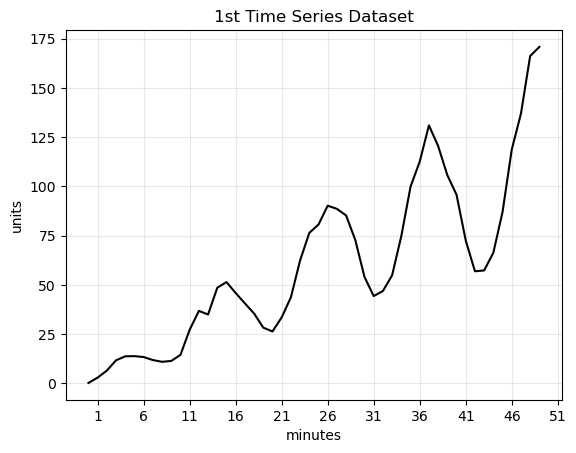

In [14]:
plt.plot(time, dataset_A, 'k-')
plt.title("1st Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.grid(alpha=0.3);

#### Additive or Multiplicative?

*Dataset A is multiplicative. We know this because magnitude of the seasonality component in the 1st plot above is dependent on the trend.*

#### Frequency of Seasonal Component?

*The frequency appears to be ~6 for Dataset_A.*

#### Plot Dataset_B

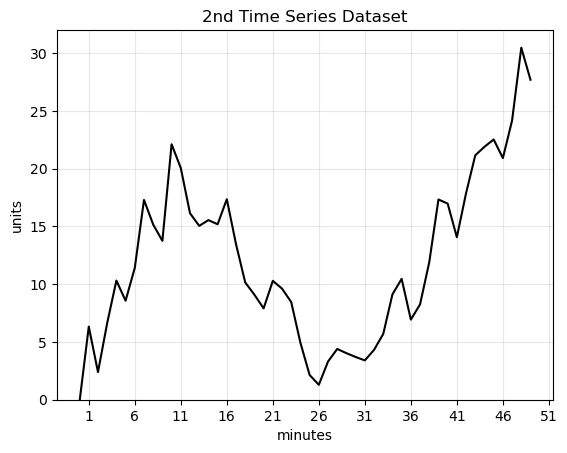

In [15]:
plt.plot(time, dataset_B, 'k-')
plt.title("2nd Time Series Dataset")
plt.xlabel("minutes")
plt.xticks(np.linspace(1,51,11, dtype='int'))
plt.ylabel("units")
plt.ylim(0, 32)
plt.grid(alpha=0.3);

#### Additive or Multiplicative?

*Dataset B is additive. We know this because the magnitude of the seasonality component in the 2nd plot above is independent of the trend.*

#### Frequency of Seasonal Component?

*The frequency appears to be ~3 for Dataset_B*.
### END SOLUTION

---
# Section 3: Time Series Decomposition

Now let's reverse directions. We have additive and multiplicative data. Let's decompose them into their three components. 

Please note that the goal here is NOT to understand HOW the decomposition works. Rather, the goal is simply to see that the time series data that we previously constructed can be decomposed into its three constituent parts: trend, seasonality, and residual.
> *Optional: look [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html) for details on how the following method works.*

Let's take a look.

### Additive Decomposition

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Empty lists to store trend, seasonal, and residual components
estimated_trend_add=[]
estimated_seasonal_add=[]
estimated_residual_add=[]

# Define start and end period for seasonal decomposition
start_period = 5
end_period = 7

# Define dataset
dataset=additive

# Generate a list of periods to iterate through
periods = range(start_period, end_period + 1, 1)

for i in periods:
    ss_decomposition = seasonal_decompose(x=dataset, model='additive',  period=i)
    estimated_trend_add.append(ss_decomposition.trend)
    estimated_seasonal_add.append(ss_decomposition.seasonal)
    estimated_residual_add.append(ss_decomposition.resid)

### Additive Plots

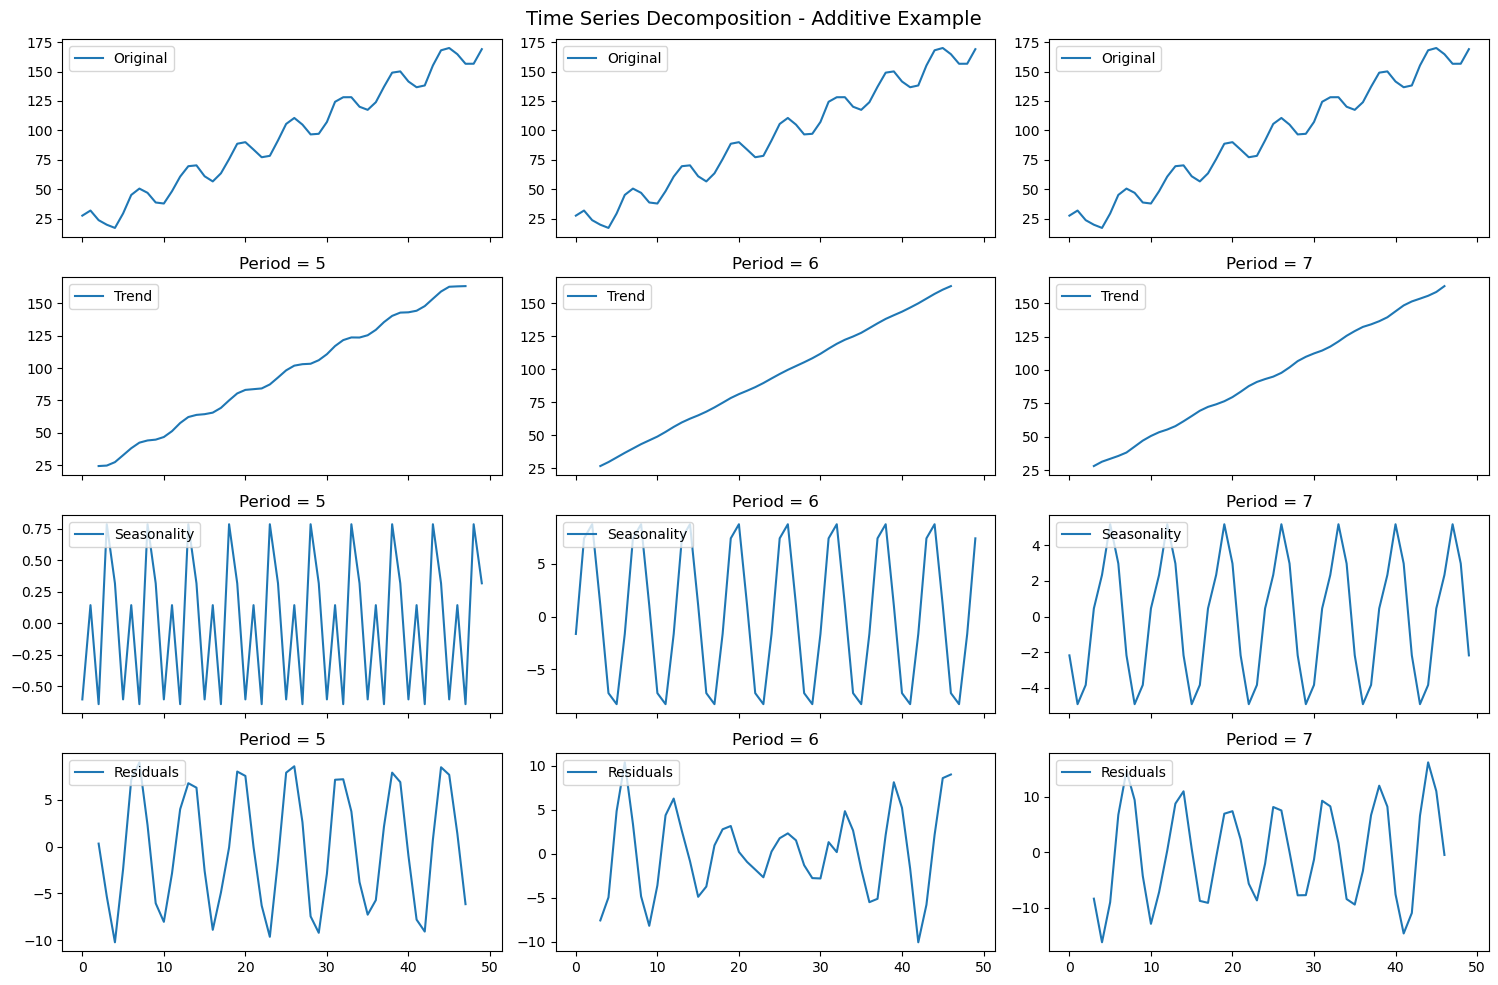

In [17]:
import matplotlib.pyplot as plt

subplot_titles = [f'Period = {p}' for p in periods]
num_components = len(subplot_titles)

fig, axes = plt.subplots(4, num_components, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

fig.suptitle('Time Series Decomposition - Additive Example', fontsize=14)

for i in range(num_components):
    axes[0, i].plot(dataset, label='Original')
    axes[0, i].legend(loc='upper left');
    

    axes[1, i].plot(estimated_trend_add[i], label='Trend')
    axes[1, i].legend(loc='upper left');
    axes[1, i].set_title(subplot_titles[i])  # Set title for trend subplot

    axes[2, i].plot(estimated_seasonal_add[i], label='Seasonality')
    axes[2, i].legend(loc='upper left');
    axes[2, i].set_title(subplot_titles[i])  # Set title for trend subplot

    axes[3, i].plot(estimated_residual_add[i], label='Residuals')
    axes[3, i].legend(loc='upper left');
    axes[3, i].set_title(subplot_titles[i])  # Set title for trend subplot
    
plt.tight_layout()  # Adjust spacing to avoid overlapping elements
plt.show()

The blue line in each plot representes the decomposition. There is a legend in the upper left corner of each plot to let you know what each plot represents. 

You can see the decomposition is not perfect with regards to seasonality and residuals, but it's pretty close! 

**NOTE:** You may notice both *trend* and *residuals* are missing data towards the beginning and end. This has to do with how trend is calculated (beyond the scope of this lesson). The residuals are missing simply because $R_{t} = O_{t} - T_{t} - S_{t}$, so missing trend values mean missing residual values as well. In other words, there is nothing wrong with these graphs. 

### Multiplicative Decomposition

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Empty lists to store trend, seasonal, and residual components
estimated_trend_mult = []
estimated_seasonal_mult = []
estimated_residual_mult = []

# Define start and end period for seasonal decomposition
start_period = 5
end_period = 7

# Define dataset
dataset=multiplicative

# Generate a list of periods to iterate through
periods = range(start_period, end_period + 1, 1)

# Loop through each period
for i in periods:
  # Perform seasonal decomposition using 'multiplicative' model for the given period
  ss_decomposition = seasonal_decompose(x=dataset, model='multiplicative', period=i)

  # Extract trend, seasonal, and residual components from the decomposition
  estimated_trend_mult.append(ss_decomposition.trend)
  estimated_seasonal_mult.append(ss_decomposition.seasonal)
  estimated_residual_mult.append(ss_decomposition.resid)


### Multiplicative Plots

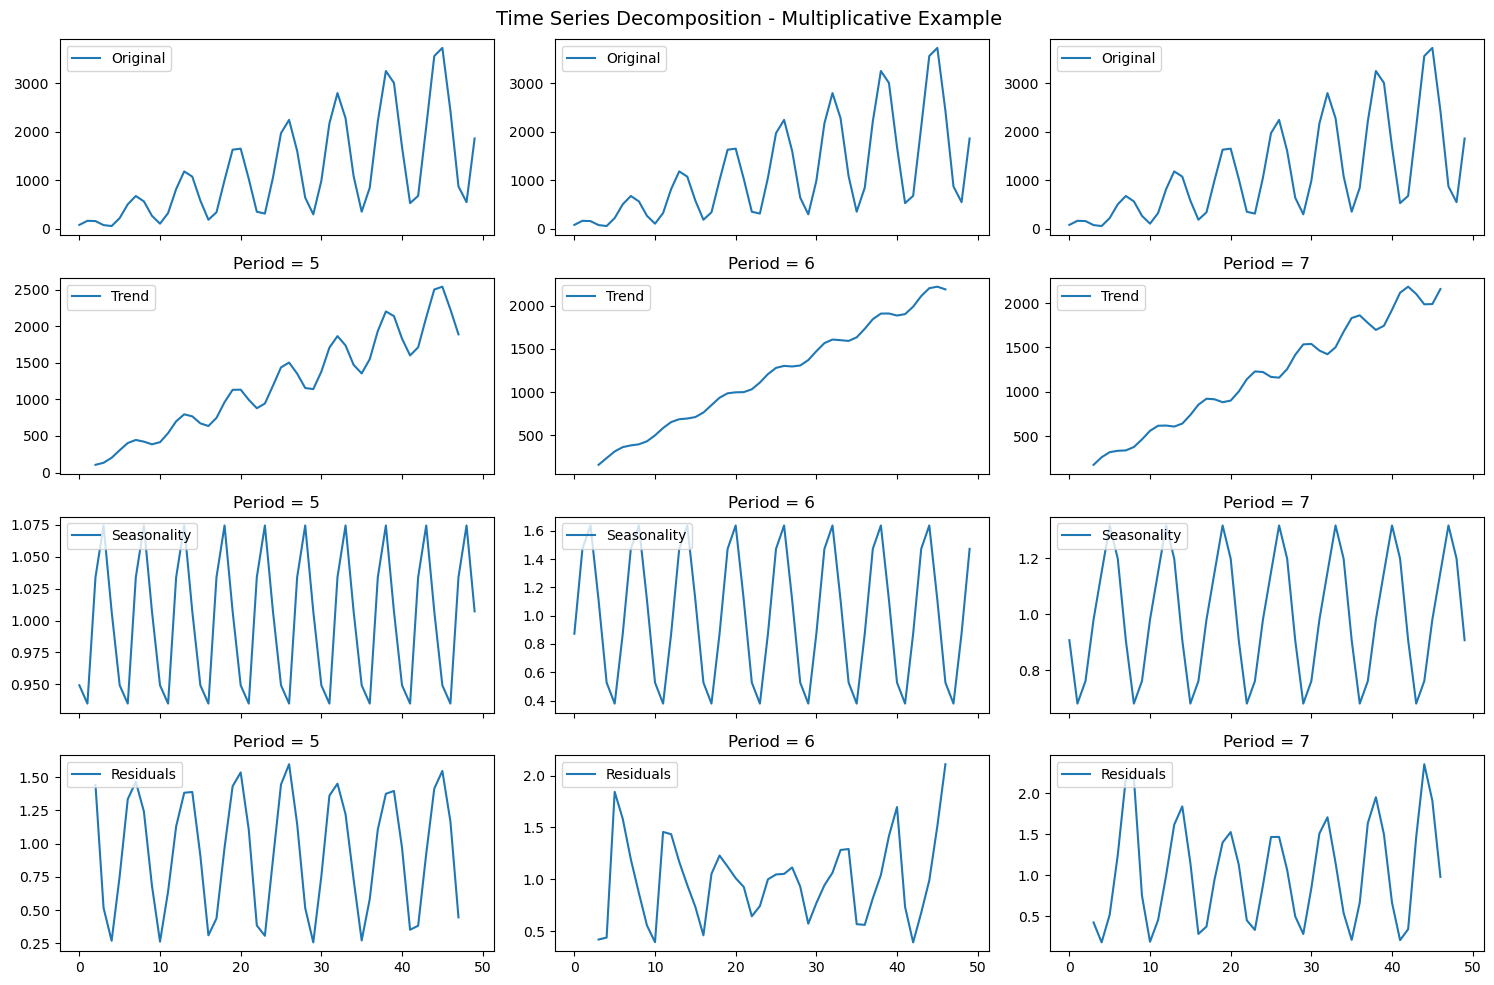

In [19]:
import matplotlib.pyplot as plt

subplot_titles = [f'Period = {p}' for p in periods]
num_components = len(subplot_titles)

#Create a figure and subplots with specific layout
fig, axes = plt.subplots(4, num_components, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

fig.suptitle('Time Series Decomposition - Multiplicative Example', fontsize=14)

# Iterate through components and plot them on separate subplots
for i in range(num_components):
    # Plot original data on the first row
    axes[0, i].plot(dataset, label='Original')
    axes[0, i].legend(loc='upper left')
    
    # Plot specific trend on the second row
    axes[1, i].plot(estimated_trend_mult[i], label='Trend')
    axes[1, i].legend(loc='upper left')
    axes[1, i].set_title(subplot_titles[i])  # Set title for trend subplot

    # Plot specific seasonal component on the third row
    axes[2, i].plot(estimated_seasonal_mult[i], label='Seasonality')
    axes[2, i].legend(loc='upper left')
    axes[2, i].set_title(subplot_titles[i])  # Set title for seasonal subplot

    # Plot specific residual on the fourth row
    axes[3, i].plot(estimated_residual_mult[i], label='Residuals')
    axes[3, i].legend(loc='upper left')
    axes[3, i].set_title(subplot_titles[i])  # Set title for residual subplot

plt.tight_layout()  # Adjust spacing to avoid overlapping elements
plt.show()

Again, the decomposition does a relatively good job picking up the overall trend and seasonality. We can see the shapes follow the patterns we expect. 

### Exercise #2
Decompose **Dataset_A** and **Dataset_B**. 

### Defining decompose function

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose(dataset, model, start_period, end_period):
  """
  Performs seasonal decomposition of a time series using the model
  for a range of periods.

  Args:
      dataset (list): The time series data to decompose.
      start_period (int): The starting period for seasonal decomposition.
      end_period (int): The ending period for seasonal decomposition.
      model (str) = additive or multiplicative

  Returns:
      tuple: A tuple containing three lists - estimated_trend, estimated_seasonal,
              and estimated_residual - for each period in the range.
  """

  estimated_trend = []
  estimated_seasonal = []
  estimated_residual = []
  periods = range(start_period, end_period + 1, 1)

  for i in periods:
    # Perform seasonal decomposition for the given period
    ss_decomposition = seasonal_decompose(x=dataset, model=model, period=i)

    # Extract trend, seasonal, and residual components
    estimated_trend.append(ss_decomposition.trend)
    estimated_seasonal.append(ss_decomposition.seasonal)
    estimated_residual.append(ss_decomposition.resid)

  return estimated_trend, estimated_seasonal, estimated_residual


# Arguments for dataset_A
dataset = dataset_A
model='multiplicative'
start_period = 9
end_period = 13
periods_A = range(start_period, end_period + 1, 1)

# Decompose the time series and store the results
decomposition_results_dataset_A = decompose(dataset, model, start_period, end_period)

# Arguments for dataset_B
dataset = dataset_B
model='additive'
start_period = 2
end_period = 6
periods_B = range(start_period, end_period + 1, 1)

# Decompose the time series and store the results
decomposition_results_dataset_B = decompose(dataset, model, start_period, end_period)


### Defining Plot_decomposition_results function

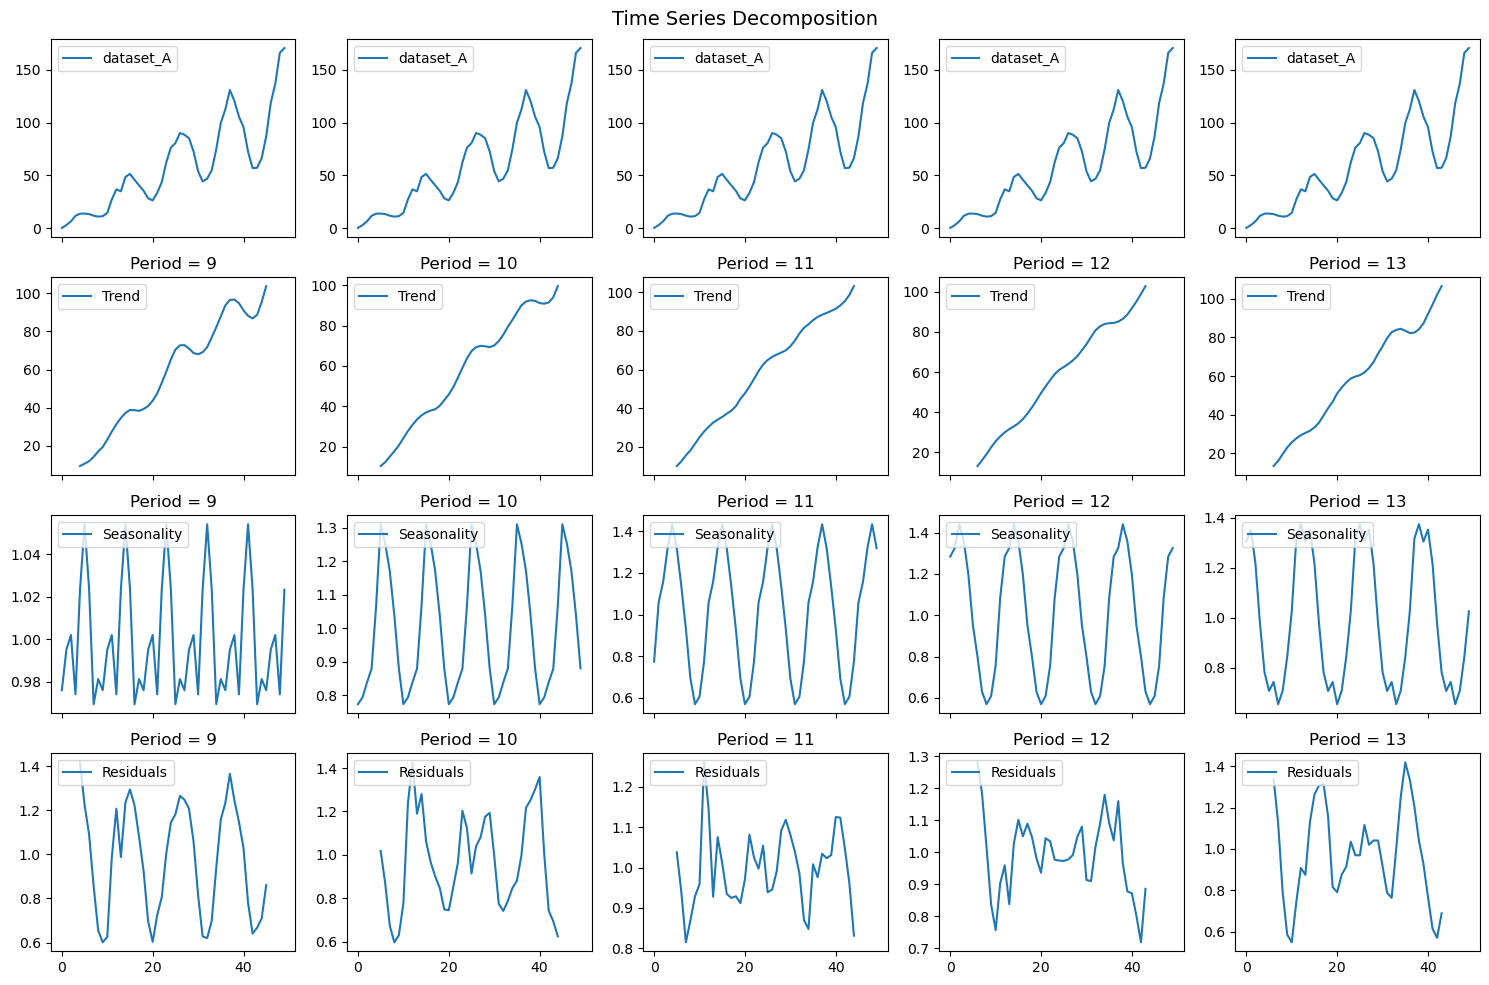

In [38]:
import matplotlib.pyplot as plt

def plot_decomposition_results(decomposition_results, periods, dataset, dataset_label='Original'):
  """
  Plots the decomposed time series components (trend, seasonal, residual)
  along with the original data.

  Args:
      decomposition_results (tuple): A tuple containing three lists - estimated_trend,
                                       estimated_seasonal, and estimated_residual -
                                       obtained from seasonal decomposition.
      periods (list): How many periods are given.
      dataset (list): The time series data.
      dataset_label (str, optional): The label to use for the original data plot.
                                       Defaults to 'Original'.
  """

  estimated_trend, estimated_seasonal, estimated_residual = decomposition_results

  # Assuming periods is defined elsewhere (obtained from start_period and end_period)
  num_components = len(periods)

  # Create a figure and subplots with specific layout
  fig, axes = plt.subplots(4, num_components, sharex=True, sharey=False)
  fig.set_figheight(10)
  fig.set_figwidth(15)

  fig.suptitle('Time Series Decomposition', fontsize=14)

  # Iterate through components and plot them on separate subplots
  for i in range(num_components):
    # Plot original data on the first row
    axes[0, i].plot(dataset, label=dataset_label)
    axes[0, i].legend(loc='upper left')

    # Plot specific trend on the second row
    axes[1, i].plot(estimated_trend[i], label='Trend')
    axes[1, i].legend(loc='upper left')
    axes[1, i].set_title(f'Period = {periods[i]}')  # Set title with period

    # Plot specific seasonal component on the third row
    axes[2, i].plot(estimated_seasonal[i], label='Seasonality')
    axes[2, i].legend(loc='upper left')
    axes[2, i].set_title(f'Period = {periods[i]}')  # Set title with period

    # Plot specific residual on the fourth row
    axes[3, i].plot(estimated_residual[i], label='Residuals')
    axes[3, i].legend(loc='upper left')
    axes[3, i].set_title(f'Period = {periods[i]}')  # Set title with period

  plt.tight_layout()
  plt.show()


# Example usage
# Assuming decomposition_results is the output from decompose_multiplicative(dataset, start_period, end_period)
plot_decomposition_results(decomposition_results_dataset_A, periods_A, dataset_A, "dataset_A")


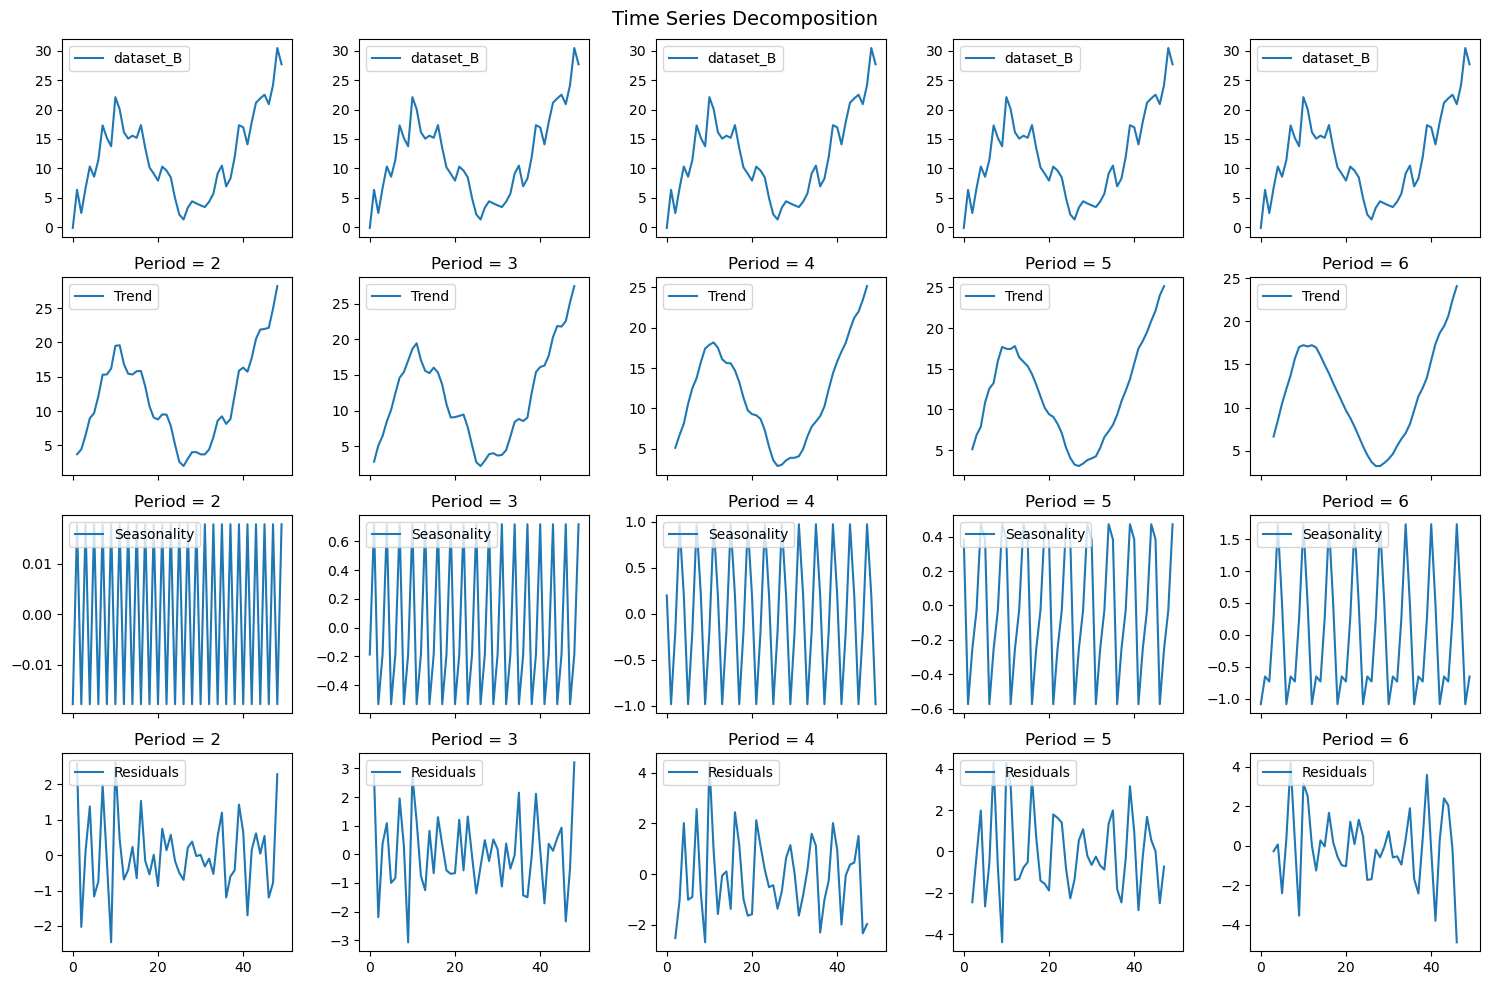

In [40]:
plot_decomposition_results(decomposition_results_dataset_B, periods_B, dataset_B, "dataset_B")

#### Decomposition Models

#### Dataset_A Plot

<Figure size 640x480 with 0 Axes>

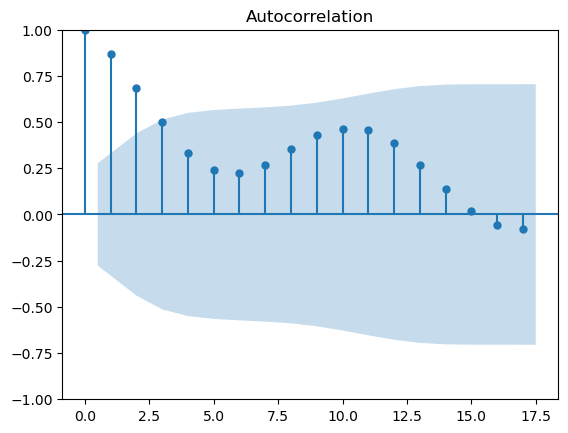

In [23]:
from statsmodels.graphics.tsaplots import plot_acf
plt.clf() #clear the current figure to avoid duplication of output
plot_acf(dataset_A)
plt.show()

#### Dataset_B Plot

<Figure size 640x480 with 0 Axes>

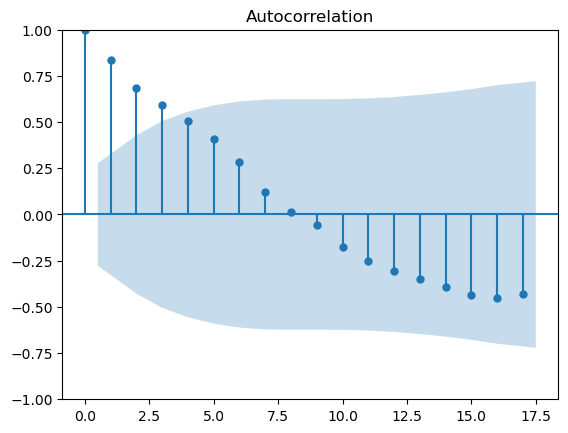

In [24]:
from statsmodels.graphics.tsaplots import plot_acf
plt.clf() #clear the current figure to avoid duplication of output
plot_acf(dataset_B)
plt.show()

---
# Summary

In this lesson you should have gained: 
1. A practical understanding of the three components of time series data 
2. A better understanding of additive and multiplicative models
3. A simple way to decompose time series data 


---
### Machine Learning Foundation (C) 2020 IBM Corporation